<a href="https://colab.research.google.com/github/chamikasudusinghe/nocml/blob/master/dos%20results%20ver%201/final%20models/fft_r1_model_single-no-dest-r1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Module Imports for Data Fetiching and Visualization



In [0]:
import time
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns

Module Imports for Data Processing

In [0]:
from sklearn import preprocessing
from sklearn.decomposition import PCA
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.manifold import TSNE

Importing Dataset from GitHub

In [0]:
df = pd.read_csv('https://raw.githubusercontent.com/chamikasudusinghe/nocml/master/dos%20results%20ver%201/router%20fetch/2-fft-normal-n-0-3-data-r1-good-single.csv?token=AKVFSOELHJ7WRSXRTQ262AS6ZAQOI')
df1 = pd.read_csv('https://raw.githubusercontent.com/chamikasudusinghe/nocml/master/dos%20results%20ver%201/router%20fetch/2-fft-normal-n-0-3-m-1-data-r1-mal.csv?token=AKVFSOCU2QW4UCWHXVST5VC6ZAQOK')
df2 = pd.read_csv('https://raw.githubusercontent.com/chamikasudusinghe/nocml/master/dos%20results%20ver%201/router%20fetch/2-fft-normal-n-0-3-m-15-data-r1-mal.csv?token=AKVFSOHE3JH43RE4TFW4NNK6ZAQOO')
df3 = pd.read_csv('https://raw.githubusercontent.com/chamikasudusinghe/nocml/master/dos%20results%20ver%201/router%20fetch/2-fft-normal-n-0-3-m-9-data-r1-mal.csv?token=AKVFSOBZDLYK6FA4SURMHL26ZAQTK')

In [34]:
print(df.shape)
print(df1.shape)
print(df2.shape)
print(df3.shape)

(56917, 30)
(89541, 30)
(48503, 30)
(51294, 30)


In [0]:
df = df.append(df1, ignore_index=True,sort=False)
df = df.sort_values('timestamp')
df.to_csv('fft-r1-train.csv',index=False)

In [0]:
df = pd.read_csv('fft-r1-train.csv')

In [37]:
df.isnull().sum()

timestamp                     0
outport                       0
inport                        0
cache_coherence_type          0
flit_id                       0
flit_type                     0
vnet                          0
vc                            0
src_ni                        0
src_router                    0
dst_ni                        0
dst_router                    0
traversal_id                  0
hop_count                     0
current_hop                   0
hop_percentage                0
enqueue_time                  0
packet_count_decr             0
packet_count_incr             0
max_packet_count              0
packet_count_index            0
packet_max_index              0
port_index                    0
cache_coherence_flit_index    0
flit_index                    0
traversal_index               0
cache_coherence_vnet_index    0
vnet_vc_index                 0
vnet_vc_cc_index              0
target                        0
dtype: int64

In [0]:
df = df.drop(columns=['timestamp','src_ni','src_router','dst_ni','dst_router'])

In [39]:
df.corr()

,outport,inport,cache_coherence_type,flit_id,flit_type,vnet,vc,traversal_id,hop_count,current_hop,hop_percentage,enqueue_time,packet_count_decr,packet_count_incr,max_packet_count,packet_count_index,packet_max_index,port_index,cache_coherence_flit_index,flit_index,traversal_index,cache_coherence_vnet_index,vnet_vc_index,vnet_vc_cc_index,target
outport,1.000000,-0.132664,0.207682,-0.002812,0.004249,-0.496226,-0.432913,-0.020164,0.256329,-0.354105,-0.585929,0.116519,-0.065046,0.068523,0.002342,0.029084,0.029332,0.510095,0.129254,0.097628,0.059863,-0.070042,-0.476178,-0.323419,0.181708
inport,-0.132664,1.000000,-0.078479,0.014421,-0.021890,-0.229975,-0.368822,0.003884,0.316213,0.154340,0.194719,0.189693,-0.050770,-0.166603,-0.146455,-0.105432,-0.079098,0.658992,-0.003756,-0.014892,-0.008132,-0.195019,-0.290458,-0.253217,0.358546
cache_coherence_type,0.207682,-0.078479,1.000000,0.325794,-0.495156,-0.148916,-0.204262,0.011487,-0.049691,-0.072235,-0.095623,-0.398152,0.065220,-0.046305,0.012745,0.026875,0.025563,0.055418,0.525600,0.422901,0.312453,0.851346,-0.173743,0.457456,0.029924
flit_id,-0.002812,0.014421,0.325794,1.000000,-0.011620,0.104046,0.044485,0.015807,0.042068,0.021598,0.000507,0.489439,-0.005011,0.054545,0.033373,0.048142,0.029972,0.008649,0.962205,0.924849,0.701244,0.358300,0.080640,0.286229,-0.013865
flit_type,0.004249,-0.021890,-0.495156,-0.011620,1.000000,-0.158119,-0.067604,-0.024061,-0.063917,-0.032799,-0.000745,0.562637,-0.131614,0.169408,0.025463,-0.010168,-0.008426,-0.013125,-0.101472,0.152598,0.112348,-0.544553,-0.122550,-0.435011,0.021088
vnet,-0.496226,-0.229975,-0.148916,0.104046,-0.158119,1.000000,0.949144,-0.005898,-0.054122,0.589835,0.587619,-0.147949,0.064902,0.058449,0.083108,0.043241,0.019497,-0.365664,-0.030990,-0.039909,-0.034004,0.391977,0.991433,0.811195,-0.302356
vc,-0.432913,-0.368822,-0.204262,0.044485,-0.067604,0.949144,1.000000,-0.011838,-0.134884,0.447725,0.455830,-0.142669,0.063043,0.111464,0.117574,0.070278,0.043053,-0.460334,-0.087824,-0.076852,-0.066740,0.313506,0.982136,0.732732,-0.339539
traversal_id,-0.020164,0.003884,0.011487,0.015807,-0.024061,-0.005898,-0.011838,1.000000,0.057484,-0.000784,-0.029498,0.022501,-0.007864,-0.007770,-0.010534,-0.023606,-0.029938,-0.008965,0.011381,0.007455,0.515721,0.007558,-0.008436,0.001489,-0.033987
hop_count,0.256329,0.316213,-0.049691,0.042068,-0.063917,-0.054122,-0.134884,0.057484,1.000000,0.335968,-0.096922,0.205837,-0.112144,-0.083244,-0.131642,-0.106335,-0.096031,0.553527,0.029760,0.006250,0.033383,-0.074943,-0.088304,-0.078056,0.151037
current_hop,-0.354105,0.154340,-0.072235,0.021598,-0.032799,0.589835,0.447725,-0.000784,0.335968,1.000000,0.820042,0.109532,0.008218,-0.060242,-0.035051,-0.046753,-0.045748,0.094675,-0.054429,-0.038573,-0.031033,0.245716,0.538272,0.487697,-0.029668


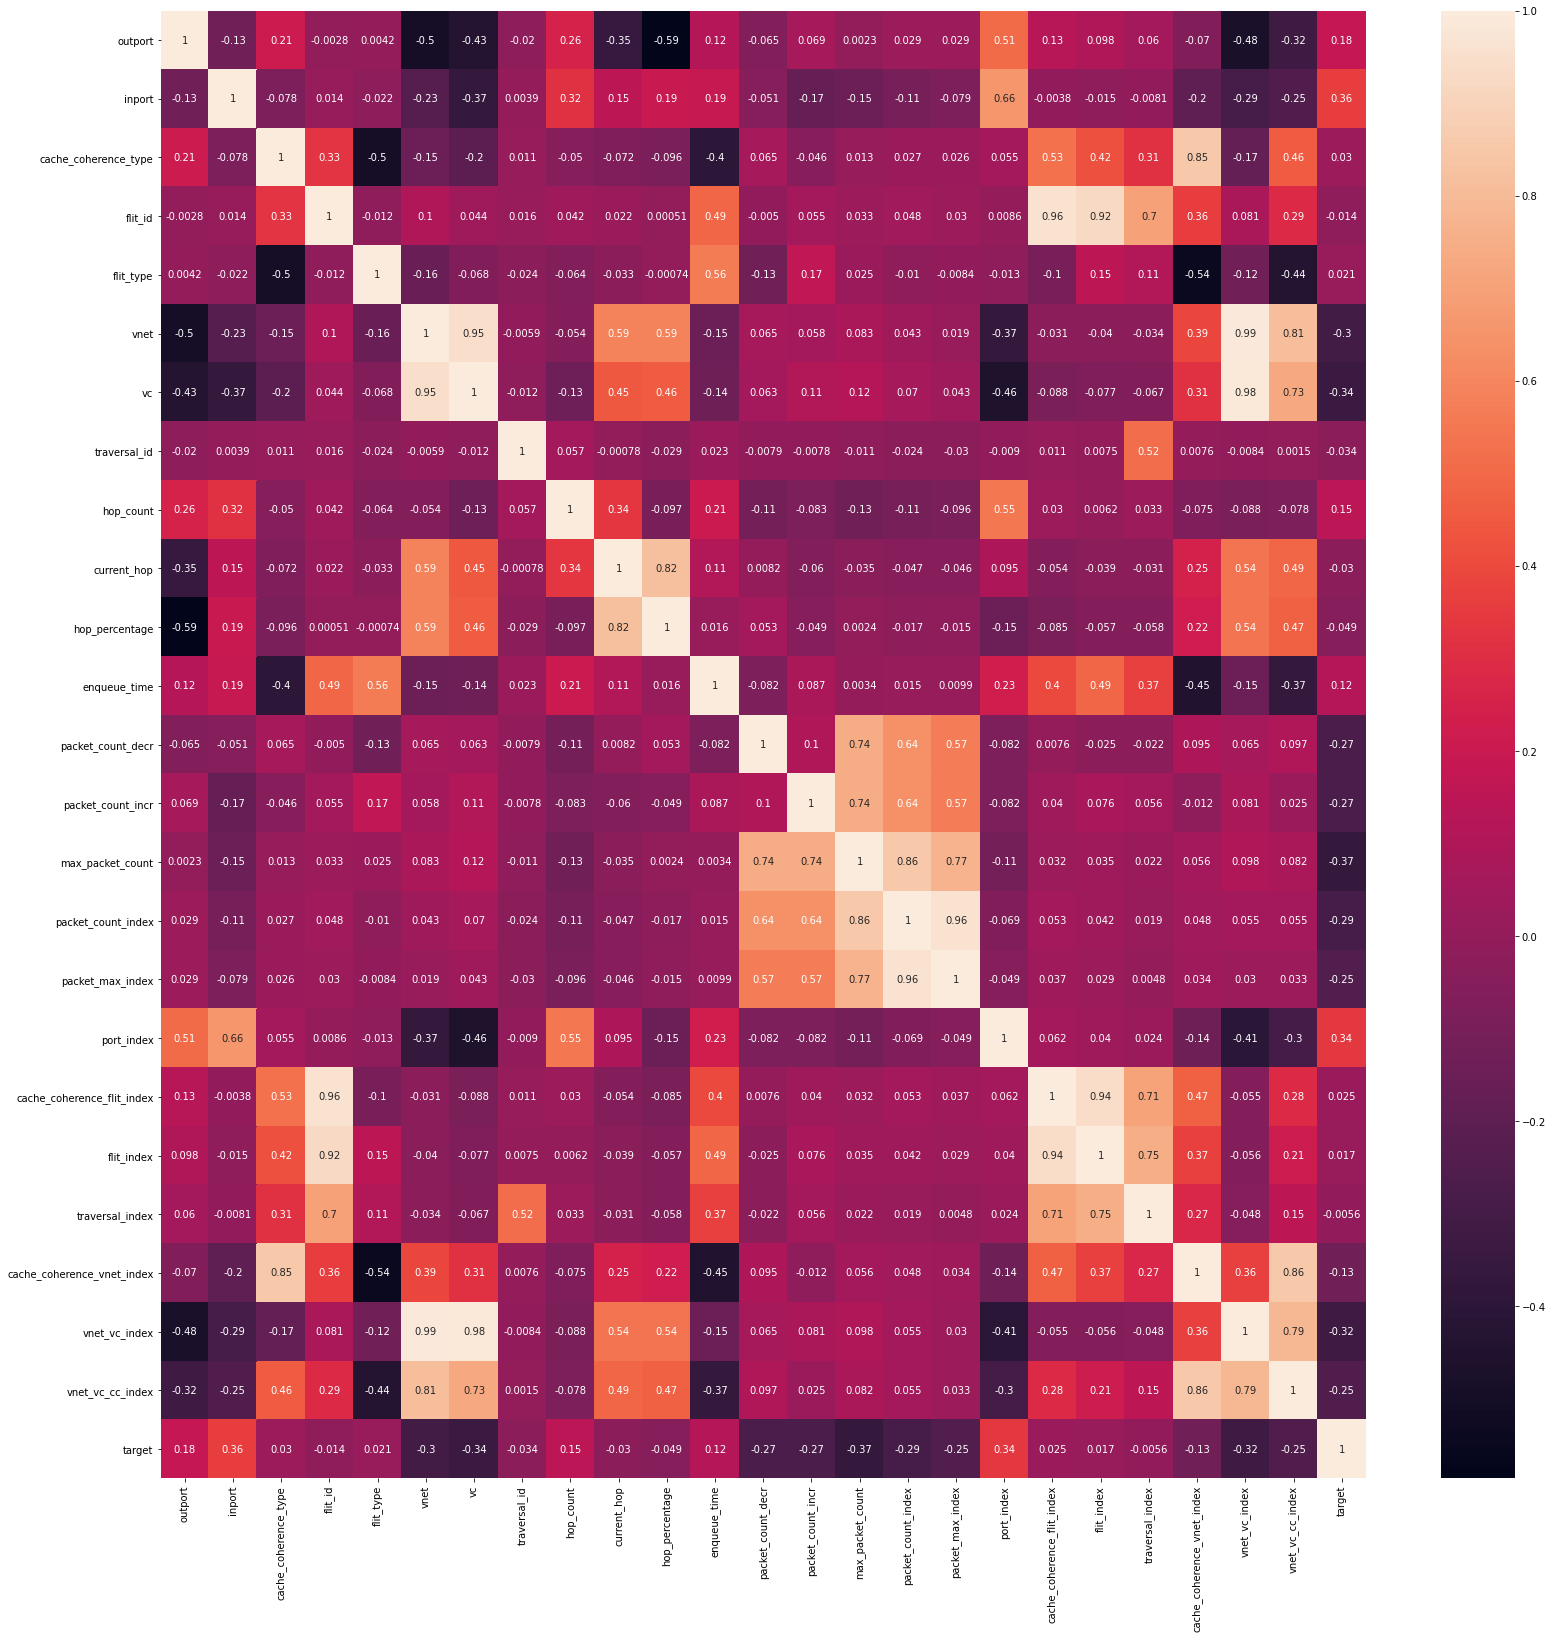

In [40]:
plt.figure(figsize=(27,27))
sns.heatmap(df.corr(), annot = True)
plt.show()

Processing Dataset for Training

In [41]:
train_X = df.drop(columns=['target'])
train_X

,outport,inport,cache_coherence_type,flit_id,flit_type,vnet,vc,traversal_id,hop_count,current_hop,hop_percentage,enqueue_time,packet_count_decr,packet_count_incr,max_packet_count,packet_count_index,packet_max_index,port_index,cache_coherence_flit_index,flit_index,traversal_index,cache_coherence_vnet_index,vnet_vc_index,vnet_vc_cc_index
0,2,0,1,1,4,3,9,2,3,0,0.000000,4,8,1,8,8,64,0,1,4,8,3,27,9
1,2,4,1,1,4,3,9,1,4,1,0.250000,8,7,2,8,14,112,8,1,4,4,3,27,9
2,2,4,1,1,4,3,9,1,4,1,0.250000,8,2,1,2,2,4,8,1,4,4,3,27,9
3,4,2,1,1,4,3,9,3,5,2,0.400000,12,1,2,2,2,4,8,1,4,12,3,27,9
4,0,1,4,1,1,5,17,2,3,3,1.000000,16,6,3,8,18,144,0,4,4,8,20,85,100
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
146453,4,2,6,2,2,3,9,20042,3,1,0.333333,15,5,1,5,5,25,8,12,24,481008,18,27,54
146454,4,2,6,3,2,3,9,20042,3,1,0.333333,22,4,2,5,8,40,8,18,36,721512,18,27,54
146455,4,2,6,4,2,3,9,20042,3,1,0.333333,29,3,3,5,9,45,8,24,48,962016,18,27,54
146456,4,2,6,5,3,3,9,20042,3,1,0.333333,36,2,4,5,8,40,8,30,90,1803780,18,27,54


In [42]:
#standardization
x = train_X.values
min_max_scaler = preprocessing.MinMaxScaler()
columns = train_X.columns
x_scaled = min_max_scaler.fit_transform(x)
train_X = pd.DataFrame(x_scaled)
train_X.columns = columns
train_X

,outport,inport,cache_coherence_type,flit_id,flit_type,vnet,vc,traversal_id,hop_count,current_hop,hop_percentage,enqueue_time,packet_count_decr,packet_count_incr,max_packet_count,packet_count_index,packet_max_index,port_index,cache_coherence_flit_index,flit_index,traversal_index,cache_coherence_vnet_index,vnet_vc_index,vnet_vc_cc_index
0,0.5,0.00,0.000000,0.00,1.000000,0.0,0.000,0.000049,0.500000,0.0,0.000000,0.000000,0.205882,0.000000,0.205882,0.021672,0.005556,0.0,0.000000,0.000000,0.000002,0.000000,0.000000,0.000000
1,0.5,1.00,0.000000,0.00,1.000000,0.0,0.000,0.000000,0.666667,0.2,0.250000,0.062500,0.176471,0.029412,0.205882,0.040248,0.009789,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,0.5,1.00,0.000000,0.00,1.000000,0.0,0.000,0.000000,0.666667,0.2,0.250000,0.062500,0.029412,0.000000,0.029412,0.003096,0.000265,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,1.0,0.50,0.000000,0.00,1.000000,0.0,0.000,0.000099,0.833333,0.4,0.400000,0.125000,0.000000,0.029412,0.029412,0.003096,0.000265,1.0,0.000000,0.000000,0.000004,0.000000,0.000000,0.000000
4,0.0,0.25,0.500000,0.00,0.000000,1.0,1.000,0.000049,0.500000,0.6,1.000000,0.187500,0.147059,0.058824,0.205882,0.052632,0.012611,0.0,0.103448,0.000000,0.000002,0.944444,1.000000,1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
146453,1.0,0.50,0.833333,0.25,0.333333,0.0,0.000,0.988849,0.500000,0.2,0.333333,0.171875,0.117647,0.000000,0.117647,0.012384,0.002117,1.0,0.379310,0.232558,0.263757,0.833333,0.000000,0.494505
146454,1.0,0.50,0.833333,0.50,0.333333,0.0,0.000,0.988849,0.500000,0.2,0.333333,0.281250,0.088235,0.029412,0.117647,0.021672,0.003439,1.0,0.586207,0.372093,0.395636,0.833333,0.000000,0.494505
146455,1.0,0.50,0.833333,0.75,0.333333,0.0,0.000,0.988849,0.500000,0.2,0.333333,0.390625,0.058824,0.058824,0.117647,0.024768,0.003880,1.0,0.793103,0.511628,0.527515,0.833333,0.000000,0.494505
146456,1.0,0.50,0.833333,1.00,0.666667,0.0,0.000,0.988849,0.500000,0.2,0.333333,0.500000,0.029412,0.088235,0.117647,0.021672,0.003439,1.0,1.000000,1.000000,0.989093,0.833333,0.000000,0.494505


In [43]:
train_X[train_X.duplicated()].shape

(186, 24)

In [0]:
test_X = df2.drop(columns=['target','timestamp','src_ni','src_router','dst_ni','dst_router'])
test_Y = df2['target']
test_XX = df3.drop(columns=['target','timestamp','src_ni','src_router','dst_ni','dst_router'])
test_YY = df3['target']

In [45]:
#standardization
x = test_X.values
min_max_scaler = preprocessing.MinMaxScaler()
columns = test_X.columns
x_scaled = min_max_scaler.fit_transform(x)
test_X = pd.DataFrame(x_scaled)
test_X.columns = columns
test_X

,outport,inport,cache_coherence_type,flit_id,flit_type,vnet,vc,traversal_id,hop_count,current_hop,hop_percentage,enqueue_time,packet_count_decr,packet_count_incr,max_packet_count,packet_count_index,packet_max_index,port_index,cache_coherence_flit_index,flit_index,traversal_index,cache_coherence_vnet_index,vnet_vc_index,vnet_vc_cc_index
0,0.50,1.0,0.000000,0.00,1.000000,0.0,0.000000,0.000000,0.6,0.2,0.250000,0.062500,0.035714,0.000000,0.035714,0.004464,0.000460,1.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,1.00,0.5,0.000000,0.00,1.000000,0.0,0.000000,0.000154,0.8,0.4,0.400000,0.125000,0.000000,0.035714,0.035714,0.004464,0.000460,1.00,0.000000,0.000000,0.000007,0.000000,0.000000,0.000000
2,0.50,1.0,0.000000,0.00,1.000000,0.0,0.000000,0.000409,0.4,0.2,0.333333,0.062500,0.000000,0.000000,0.000000,0.000000,0.000000,1.00,0.000000,0.000000,0.000018,0.000000,0.000000,0.000000
3,0.50,1.0,0.000000,0.00,1.000000,0.0,0.000000,0.000563,0.6,0.2,0.250000,0.062500,0.000000,0.000000,0.000000,0.000000,0.000000,1.00,0.000000,0.000000,0.000025,0.000000,0.000000,0.000000
4,0.25,0.5,0.000000,0.00,1.000000,0.0,0.000000,0.000614,0.4,0.4,0.666667,0.125000,0.000000,0.000000,0.000000,0.000000,0.000000,0.25,0.000000,0.000000,0.000027,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48498,0.25,1.0,0.666667,0.50,0.333333,0.0,0.000000,0.999898,0.4,0.2,0.333333,0.281250,0.142857,0.071429,0.214286,0.062500,0.015941,0.50,0.482759,0.302326,0.333417,0.666667,0.000000,0.666667
48499,0.25,1.0,0.666667,0.75,0.333333,0.0,0.000000,0.999898,0.4,0.2,0.333333,0.390625,0.107143,0.107143,0.214286,0.066964,0.017014,0.50,0.655172,0.418605,0.444557,0.666667,0.000000,0.666667
48500,0.25,1.0,0.666667,1.00,0.666667,0.0,0.000000,0.999898,0.4,0.2,0.333333,0.500000,0.071429,0.142857,0.214286,0.062500,0.015941,0.50,0.827586,0.825581,0.833546,0.666667,0.000000,0.666667
48501,0.25,1.0,0.000000,0.00,1.000000,0.0,0.333333,1.000000,0.4,0.2,0.333333,0.500000,0.035714,0.178571,0.214286,0.049107,0.012722,0.50,0.000000,0.000000,0.044458,0.000000,0.333333,0.000000


In [46]:
test_X[test_X.duplicated()].shape

(55, 24)

In [47]:
#standardization
x = test_XX.values
min_max_scaler = preprocessing.MinMaxScaler()
columns = test_XX.columns
x_scaled = min_max_scaler.fit_transform(x)
test_XX = pd.DataFrame(x_scaled)
test_XX.columns = columns
test_XX

,outport,inport,cache_coherence_type,flit_id,flit_type,vnet,vc,traversal_id,hop_count,current_hop,hop_percentage,enqueue_time,packet_count_decr,packet_count_incr,max_packet_count,packet_count_index,packet_max_index,port_index,cache_coherence_flit_index,flit_index,traversal_index,cache_coherence_vnet_index,vnet_vc_index,vnet_vc_cc_index
0,0.50,1.0,0.000000,0.00,1.000000,0.0,0.000000,0.000000,0.6,0.5,0.250000,0.063492,0.034483,0.000000,0.034483,0.004184,0.000417,1.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,1.00,0.5,0.000000,0.00,1.000000,0.0,0.000000,0.000143,0.8,1.0,0.400000,0.126984,0.000000,0.034483,0.034483,0.004184,0.000417,1.00,0.000000,0.000000,0.000006,0.000000,0.000000,0.000000
2,0.50,1.0,0.000000,0.00,1.000000,0.0,0.000000,0.000382,0.4,0.5,0.333333,0.063492,0.000000,0.000000,0.000000,0.000000,0.000000,1.00,0.000000,0.000000,0.000017,0.000000,0.000000,0.000000
3,0.50,1.0,0.000000,0.00,1.000000,0.0,0.000000,0.000525,0.6,0.5,0.250000,0.063492,0.000000,0.000000,0.000000,0.000000,0.000000,1.00,0.000000,0.000000,0.000023,0.000000,0.000000,0.000000
4,0.25,0.5,0.000000,0.00,1.000000,0.0,0.000000,0.000573,0.4,1.0,0.666667,0.126984,0.000000,0.000000,0.000000,0.000000,0.000000,0.25,0.000000,0.000000,0.000025,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51289,1.00,0.5,0.666667,0.25,0.333333,0.0,0.000000,0.999905,0.6,1.0,0.500000,0.238095,0.137931,0.034483,0.172414,0.037657,0.008196,1.00,0.310345,0.186047,0.222284,0.666667,0.000000,0.666667
51290,1.00,0.5,0.666667,0.50,0.333333,0.0,0.000000,0.999905,0.6,1.0,0.500000,0.349206,0.103448,0.068966,0.172414,0.046025,0.009862,1.00,0.482759,0.302326,0.333427,0.666667,0.000000,0.666667
51291,1.00,0.5,0.666667,0.75,0.333333,0.0,0.000000,0.999905,0.6,1.0,0.500000,0.460317,0.068966,0.103448,0.172414,0.046025,0.009862,1.00,0.655172,0.418605,0.444571,0.666667,0.000000,0.666667
51292,1.00,0.5,0.666667,1.00,0.666667,0.0,0.000000,0.999905,0.6,1.0,0.500000,0.571429,0.034483,0.137931,0.172414,0.037657,0.008196,1.00,0.827586,0.825581,0.833572,0.666667,0.000000,0.666667


In [48]:
test_XX[test_XX.duplicated()].shape

(46, 24)

#### Machine Learning Models

Module Imports for Data Processing and Report Generation in Machine Learning Models

In [0]:
from sklearn.model_selection import train_test_split

import statsmodels.api as sm
from sklearn import metrics

from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score

Labels

1.   0 -  malicious
2.   1 -  good



In [50]:
train_Y = df['target']
train_Y.value_counts()

0    89541
1    56917
Name: target, dtype: int64

Training and Validation Splitting of the Dataset

In [0]:
seed = 5
np.random.seed(seed)

In [0]:
X_train, X_test, y_train, y_test = train_test_split(train_X, train_Y, test_size=0.2, random_state=seed, shuffle=True)

Feature Selection

                         Specs        Score
5                         vnet  9357.769181
22               vnet_vc_index  8532.909572
6                           vc  7777.306871
17                  port_index  6642.235898
1                       inport  4424.021944
14            max_packet_count  2892.967288
13           packet_count_incr  1447.675929
12           packet_count_decr  1445.291500
15          packet_count_index  1355.001466
0                      outport  1176.344917
23            vnet_vc_cc_index  1148.426564
16            packet_max_index   893.975404
21  cache_coherence_vnet_index   247.707316
8                    hop_count   246.667042
11                enqueue_time   173.182943
10              hop_percentage    83.446567
7                 traversal_id    21.590501


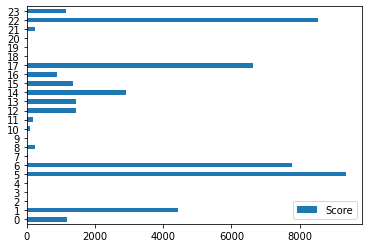

In [53]:
#SelectKBest for feature selection
bf = SelectKBest(score_func=chi2, k=17)
fit = bf.fit(X_train,y_train)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(columns)

featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score'] 
print(featureScores.nlargest(17,'Score'))
featureScores.plot(kind='barh')

Logistic Regression

In [0]:
#logistic regression
from sklearn.linear_model import LogisticRegression

In [0]:
logit_model=sm.Logit(train_Y,train_X)
#result=logit_model.fit()
#print(result.summary2())

In [58]:
logreg = LogisticRegression(C=10,penalty='l2',random_state=42, max_iter=500)
logreg.fit(X_train, y_train)

LogisticRegression(C=10, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=500,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=42, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [59]:
y_pred = logreg.predict(X_test)
logreg_score_train = logreg.score(X_train,y_train)
print("Train Prediction Score",logreg_score_train*100)
logreg_score_test = accuracy_score(y_test,y_pred)
print("Test Prediction ",logreg_score_test*100)

Train Prediction Score 76.60413430517386
Test Prediction  76.39969957667623


In [60]:
y_pred_test = logreg.predict(test_X)
logreg_score_test = accuracy_score(test_Y,y_pred_test)
print("Test Prediction ",logreg_score_test*100)

Test Prediction  66.19384367977239


In [61]:
y_pred_test1 = logreg.predict(test_XX)
logreg_score_test = accuracy_score(test_YY,y_pred_test1)
print("Test Prediction ",logreg_score_test*100)

Test Prediction  31.434475767146253


In [62]:
feature_importance=pd.DataFrame(np.hstack((np.array([columns[::]]).T, logreg.coef_.T)), columns=['feature', 'importance'])
feature_importance['importance']=pd.to_numeric(feature_importance['importance'])
feature_importance.sort_values(by='importance', ascending=False)

,feature,importance
1,inport,3.921915
9,current_hop,3.517210
18,cache_coherence_flit_index,3.428046
15,packet_count_index,3.362067
0,outport,2.751412
2,cache_coherence_type,1.748334
6,vc,1.645397
4,flit_type,0.201580
20,traversal_index,0.055219
11,enqueue_time,-0.248397


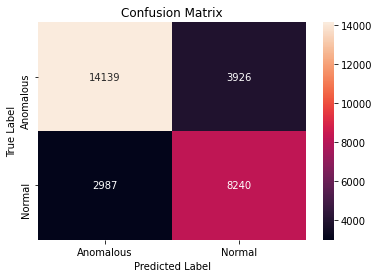

In [63]:
cm = confusion_matrix(y_test, y_pred)
class_label = ["Anomalous", "Normal"]
df_cm = pd.DataFrame(cm, index=class_label,columns=class_label)
sns.heatmap(df_cm, annot=True, fmt='d')
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [64]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.83      0.78      0.80     18065
           1       0.68      0.73      0.70     11227

    accuracy                           0.76     29292
   macro avg       0.75      0.76      0.75     29292
weighted avg       0.77      0.76      0.77     29292



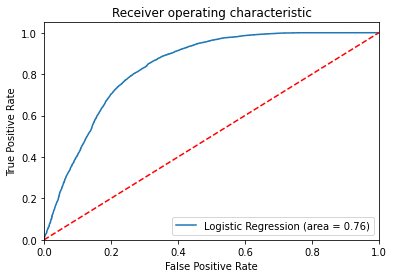

In [65]:
logit_roc_auc = roc_auc_score(y_test, logreg.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('LOG_ROC')
plt.show()

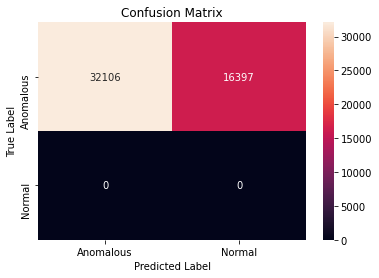

In [66]:
cm = confusion_matrix(test_Y, y_pred_test)
class_label = ["Anomalous", "Normal"]
df_cm = pd.DataFrame(cm, index=class_label,columns=class_label)
sns.heatmap(df_cm, annot=True, fmt='d')
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [67]:
print(classification_report(test_Y, y_pred_test))

              precision    recall  f1-score   support

           0       1.00      0.66      0.80     48503
           1       0.00      0.00      0.00         0

    accuracy                           0.66     48503
   macro avg       0.50      0.33      0.40     48503
weighted avg       1.00      0.66      0.80     48503



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


KNeighbors Classifier

In [68]:
#KNeighborsClassifier
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [0]:
y_pred_knn= knn.predict(X_test)

In [70]:
knn_score_train = knn.score(X_train,y_train)
print("Train Prediction Score",knn_score_train*100)
knn_score_test = accuracy_score(y_test,y_pred_knn)
print("Test Prediction ",knn_score_test*100)

Train Prediction Score 88.47788607616543
Test Prediction  83.20360507988529


In [71]:
y_pred_knn_test= knn.predict(test_X)
knn_score_test = accuracy_score(test_Y,y_pred_knn_test)
print("Test Prediction ",knn_score_test*100)

Test Prediction  55.02752407067604


In [72]:
y_pred_knn_test_x= knn.predict(test_XX)
knn_score_test = accuracy_score(test_YY,y_pred_knn_test_x)
print("Test Prediction ",knn_score_test*100)

Test Prediction  51.62787070612548


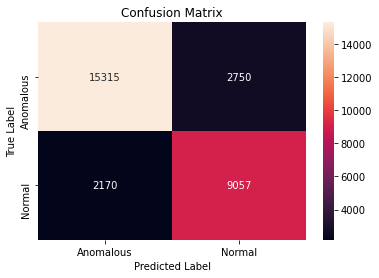

In [73]:
cm = confusion_matrix(y_test, y_pred_knn)
class_label = ["Anomalous", "Normal"]
df_cm = pd.DataFrame(cm, index=class_label,columns=class_label)
sns.heatmap(df_cm, annot=True, fmt='d')
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [74]:
print(classification_report(y_test,y_pred_knn))

              precision    recall  f1-score   support

           0       0.88      0.85      0.86     18065
           1       0.77      0.81      0.79     11227

    accuracy                           0.83     29292
   macro avg       0.82      0.83      0.82     29292
weighted avg       0.83      0.83      0.83     29292



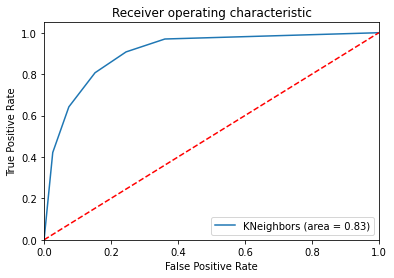

In [75]:
knn_roc_auc = roc_auc_score(y_test, y_pred_knn)
fpr, tpr, thresholds = roc_curve(y_test, knn.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='KNeighbors (area = %0.2f)' % knn_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('KNN_ROC')
plt.show()

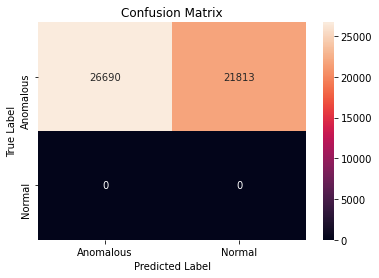

In [76]:
cm = confusion_matrix(test_Y, y_pred_knn_test)
class_label = ["Anomalous", "Normal"]
df_cm = pd.DataFrame(cm, index=class_label,columns=class_label)
sns.heatmap(df_cm, annot=True, fmt='d')
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [77]:
print(classification_report(test_Y,y_pred_knn_test))

              precision    recall  f1-score   support

           0       1.00      0.55      0.71     48503
           1       0.00      0.00      0.00         0

    accuracy                           0.55     48503
   macro avg       0.50      0.28      0.35     48503
weighted avg       1.00      0.55      0.71     48503



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Naive Bayes Classifier

In [0]:
#naive_bayes
from sklearn.naive_bayes import GaussianNB

In [79]:
nb = GaussianNB()
nb.fit(X_train,y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [0]:
y_pred_nb= nb.predict(X_test)

In [81]:
nb_score_train = nb.score(X_train,y_train)
print("Train Prediction Score",nb_score_train*100)
nb_score_test = accuracy_score(y_test,y_pred_nb)
print("Test Prediction Score",nb_score_test*100)

Train Prediction Score 59.64528958912996
Test Prediction Score 59.22094769903046


In [82]:
y_pred_nb_test= nb.predict(test_X)
nb_score_test = accuracy_score(test_Y,y_pred_nb_test)
print("Test Prediction Score",nb_score_test*100)

Test Prediction Score 34.53806981011484


In [83]:
y_pred_nb_test= nb.predict(test_XX)
nb_score_test = accuracy_score(test_YY,y_pred_nb_test)
print("Test Prediction Score",nb_score_test*100)

Test Prediction Score 37.942059500136466


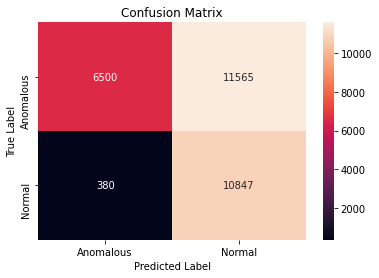

In [84]:
cm = confusion_matrix(y_test, y_pred_nb)
class_label = ["Anomalous", "Normal"]
df_cm = pd.DataFrame(cm, index=class_label,columns=class_label)
sns.heatmap(df_cm, annot=True, fmt='d')
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [85]:
print(classification_report(y_test,y_pred_nb))

              precision    recall  f1-score   support

           0       0.94      0.36      0.52     18065
           1       0.48      0.97      0.64     11227

    accuracy                           0.59     29292
   macro avg       0.71      0.66      0.58     29292
weighted avg       0.77      0.59      0.57     29292



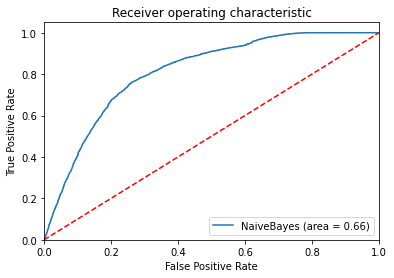

In [86]:
nb_roc_auc = roc_auc_score(y_test, y_pred_nb)
fpr, tpr, thresholds = roc_curve(y_test, nb.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='NaiveBayes (area = %0.2f)' % nb_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('NB_ROC')
plt.show()

### Neural Networks

In [87]:
#neuralnetwork
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import to_categorical
from keras.callbacks import EarlyStopping
from keras.layers import BatchNormalization, Dropout
from keras.optimizers import SGD
from keras.layers import PReLU

Using TensorFlow backend.


2-Layer Neural Network

In [88]:
#2layer
model = Sequential()
n_cols = X_train.shape[1]
model.add(Dense(2, activation='relu', input_shape=(n_cols,)))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['accuracy'])
early_stopping_monitor = EarlyStopping(patience=20)
history = model.fit(X_train, y_train, epochs=10, validation_split=0.2 )

Train on 93732 samples, validate on 23434 samples
Epoch 1/10
93732/93732 [==============================] - 4s 40us/step - loss: 0.1753 - accuracy: 0.7378 - val_loss: 0.1634 - val_accuracy: 0.7584
Epoch 2/10
93732/93732 [==============================] - 3s 36us/step - loss: 0.1630 - accuracy: 0.7602 - val_loss: 0.1608 - val_accuracy: 0.7614
Epoch 3/10
93732/93732 [==============================] - 3s 37us/step - loss: 0.1609 - accuracy: 0.7640 - val_loss: 0.1592 - val_accuracy: 0.7666
Epoch 4/10
93732/93732 [==============================] - 3s 37us/step - loss: 0.1597 - accuracy: 0.7663 - val_loss: 0.1584 - val_accuracy: 0.7707
Epoch 5/10
93732/93732 [==============================] - 3s 37us/step - loss: 0.1589 - accuracy: 0.7669 - val_loss: 0.1580 - val_accuracy: 0.7690
Epoch 6/10
93732/93732 [==============================] - 3s 37us/step - loss: 0.1584 - accuracy: 0.7675 - val_loss: 0.1573 - val_accuracy: 0.7690
Epoch 7/10
93732/93732 [==============================] - 3s 36us/st

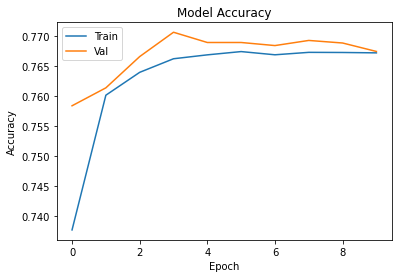

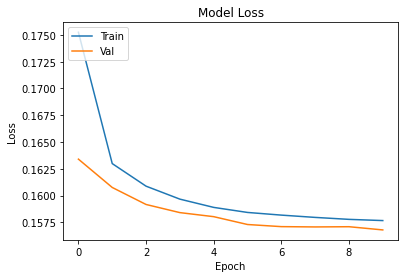

In [89]:
# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

In [90]:
scores = model.evaluate(X_test, y_test, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

accuracy: 76.56%


In [91]:
scores = model.evaluate(test_X, test_Y, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

accuracy: 49.63%


3-Layer Neural Network

In [92]:
#3layer
model = Sequential()
n_cols = X_train.shape[1]
model.add(Dense(4, activation="relu", input_shape=(n_cols,)))
model.add(Dense(2, activation="relu"))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='sgd', loss='mean_squared_error', metrics=['accuracy'])
early_stopping_monitor = EarlyStopping(patience=20)
history = model.fit(X_train, y_train, epochs=30, validation_split=0.2 )

Train on 93732 samples, validate on 23434 samples
Epoch 1/30
93732/93732 [==============================] - 4s 38us/step - loss: 0.2421 - accuracy: 0.5936 - val_loss: 0.2367 - val_accuracy: 0.6154
Epoch 2/30
93732/93732 [==============================] - 3s 37us/step - loss: 0.2381 - accuracy: 0.6087 - val_loss: 0.2366 - val_accuracy: 0.6154
Epoch 3/30
93732/93732 [==============================] - 3s 37us/step - loss: 0.2380 - accuracy: 0.6087 - val_loss: 0.2365 - val_accuracy: 0.6154
Epoch 4/30
93732/93732 [==============================] - 3s 36us/step - loss: 0.2362 - accuracy: 0.6113 - val_loss: 0.2290 - val_accuracy: 0.6292
Epoch 5/30
93732/93732 [==============================] - 4s 38us/step - loss: 0.2110 - accuracy: 0.6636 - val_loss: 0.1926 - val_accuracy: 0.7059
Epoch 6/30
93732/93732 [==============================] - 4s 37us/step - loss: 0.1819 - accuracy: 0.7282 - val_loss: 0.1720 - val_accuracy: 0.7474
Epoch 7/30
93732/93732 [==============================] - 3s 37us/st

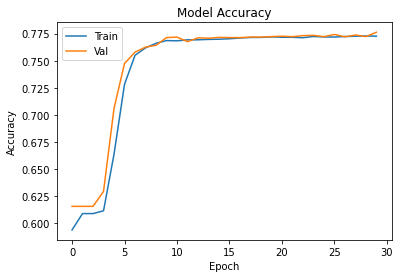

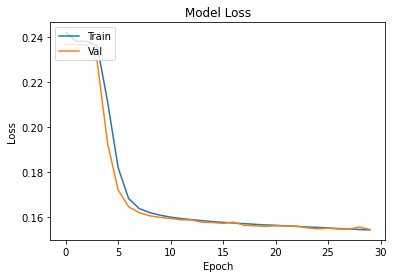

In [93]:
# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

In [94]:
scores = model.evaluate(X_test, y_test, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

accuracy: 77.21%


In [95]:
scores = model.evaluate(test_X, test_Y, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

accuracy: 50.61%


In [96]:
scores = model.evaluate(test_XX, test_YY, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

accuracy: 35.95%


4-Layer Neural Network



In [97]:
#4layer
model = Sequential()
n_cols = X_train.shape[1]
n_cols
model.add(Dense(8, activation='relu', input_shape=(n_cols,)))
model.add(Dense(4, activation='relu'))
model.add(Dense(2, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='sgd', loss='mean_squared_error', metrics=['accuracy'])
early_stopping_monitor = EarlyStopping(patience=20)
history = model.fit(X_train, y_train, epochs=30, validation_split=0.2)

Train on 93732 samples, validate on 23434 samples
Epoch 1/30
93732/93732 [==============================] - 4s 38us/step - loss: 0.2016 - accuracy: 0.6637 - val_loss: 0.1758 - val_accuracy: 0.7399
Epoch 2/30
93732/93732 [==============================] - 4s 37us/step - loss: 0.1658 - accuracy: 0.7552 - val_loss: 0.1592 - val_accuracy: 0.7610
Epoch 3/30
93732/93732 [==============================] - 4s 38us/step - loss: 0.1573 - accuracy: 0.7673 - val_loss: 0.1556 - val_accuracy: 0.7698
Epoch 4/30
93732/93732 [==============================] - 4s 38us/step - loss: 0.1545 - accuracy: 0.7729 - val_loss: 0.1533 - val_accuracy: 0.7711
Epoch 5/30
93732/93732 [==============================] - 4s 38us/step - loss: 0.1528 - accuracy: 0.7754 - val_loss: 0.1521 - val_accuracy: 0.7781
Epoch 6/30
93732/93732 [==============================] - 4s 38us/step - loss: 0.1516 - accuracy: 0.7779 - val_loss: 0.1510 - val_accuracy: 0.7789
Epoch 7/30
93732/93732 [==============================] - 4s 39us/st

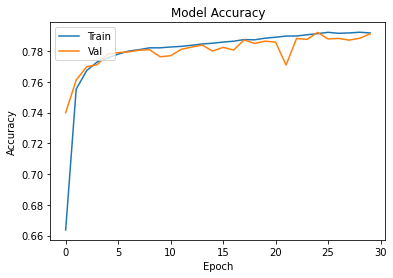

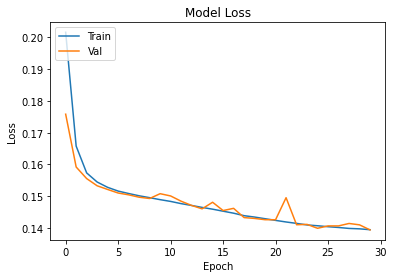

In [98]:
# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

In [99]:
scores = model.evaluate(X_test, y_test, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

accuracy: 78.65%


In [100]:
scores = model.evaluate(test_X, test_Y, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

accuracy: 70.49%


In [101]:
scores = model.evaluate(test_XX, test_YY, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

accuracy: 59.71%


5-Layer Neural Network Optimized

In [102]:
#5layer
model = Sequential()
n_cols = X_train.shape[1]
model.add(Dense(32, input_shape=(n_cols,),kernel_initializer='RandomUniform'))
model.add(PReLU())
model.add(BatchNormalization())
model.add(Dense(16))
model.add(PReLU())
model.add(BatchNormalization())
model.add(Dense(8))
model.add(PReLU())
model.add(BatchNormalization())
model.add(Dense(4))
model.add(PReLU())
model.add(BatchNormalization())
model.add(Dropout(0.001,seed=5))
model.add(Dense(1, activation='hard_sigmoid', kernel_initializer = "RandomUniform"))
opt = SGD(lr=0.02, momentum=0.9)
model.compile(optimizer=opt, loss='mean_squared_error', metrics=['accuracy'])
early_stopping_monitor = EarlyStopping(patience=20)
history = model.fit(X_train, y_train, epochs=100, validation_split=0.2)

Train on 93732 samples, validate on 23434 samples
Epoch 1/100
93732/93732 [==============================] - 8s 88us/step - loss: 0.1530 - accuracy: 0.7715 - val_loss: 0.1418 - val_accuracy: 0.7874
Epoch 2/100
93732/93732 [==============================] - 7s 79us/step - loss: 0.1414 - accuracy: 0.7873 - val_loss: 0.1386 - val_accuracy: 0.7935
Epoch 3/100
93732/93732 [==============================] - 7s 76us/step - loss: 0.1378 - accuracy: 0.7933 - val_loss: 0.1325 - val_accuracy: 0.8014
Epoch 4/100
93732/93732 [==============================] - 7s 80us/step - loss: 0.1358 - accuracy: 0.7960 - val_loss: 0.1309 - val_accuracy: 0.8040
Epoch 5/100
93732/93732 [==============================] - 7s 77us/step - loss: 0.1348 - accuracy: 0.7984 - val_loss: 0.1331 - val_accuracy: 0.7958
Epoch 6/100
93732/93732 [==============================] - 8s 80us/step - loss: 0.1339 - accuracy: 0.7980 - val_loss: 0.1315 - val_accuracy: 0.8040
Epoch 7/100
93732/93732 [==============================] - 7s 

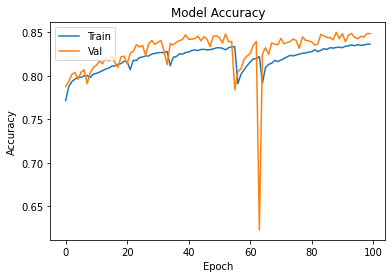

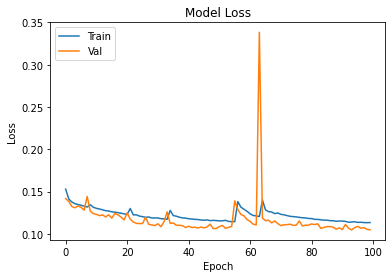

In [103]:
# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

In [104]:
scores = model.evaluate(X_test, y_test, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

accuracy: 84.90%


In [105]:
scores = model.evaluate(test_X, test_Y, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

accuracy: 58.77%


In [106]:
scores = model.evaluate(test_XX, test_YY, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

accuracy: 67.05%


In [113]:
#6layer
model = Sequential()
n_cols = X_train.shape[1]
model.add(Dense(32, input_shape=(n_cols,),kernel_initializer='RandomUniform'))
model.add(PReLU())
model.add(BatchNormalization())
model.add(Dense(16))
model.add(PReLU())
model.add(BatchNormalization())
model.add(Dense(8))
model.add(PReLU())
model.add(BatchNormalization())
model.add(Dense(4))
model.add(PReLU())
model.add(Dense(2))
model.add(PReLU())
model.add(BatchNormalization())
model.add(Dropout(0.001,seed=5))
model.add(Dense(1, activation='hard_sigmoid', kernel_initializer = "RandomUniform"))
opt = SGD(lr=0.02, momentum=0.9)
model.compile(optimizer=opt, loss='mean_squared_error', metrics=['accuracy'])
early_stopping_monitor = EarlyStopping(patience=20)
history = model.fit(X_train, y_train, epochs=50, validation_split=0.2)

Train on 93732 samples, validate on 23434 samples
Epoch 1/50
93732/93732 [==============================] - 10s 104us/step - loss: 0.1537 - accuracy: 0.7695 - val_loss: 0.1431 - val_accuracy: 0.7858
Epoch 2/50
93732/93732 [==============================] - 9s 96us/step - loss: 0.1432 - accuracy: 0.7851 - val_loss: 0.1375 - val_accuracy: 0.7979
Epoch 3/50
93732/93732 [==============================] - 9s 97us/step - loss: 0.1394 - accuracy: 0.7908 - val_loss: 0.1318 - val_accuracy: 0.8029
Epoch 4/50
93732/93732 [==============================] - 9s 100us/step - loss: 0.1366 - accuracy: 0.7952 - val_loss: 0.1299 - val_accuracy: 0.8031
Epoch 5/50
93732/93732 [==============================] - 9s 99us/step - loss: 0.1354 - accuracy: 0.7962 - val_loss: 0.1428 - val_accuracy: 0.7950
Epoch 6/50
93732/93732 [==============================] - 9s 91us/step - loss: 0.1381 - accuracy: 0.7939 - val_loss: 0.1276 - val_accuracy: 0.8043
Epoch 7/50
93732/93732 [==============================] - 10s 103

In [114]:
scores = model.evaluate(X_test, y_test, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

accuracy: 82.26%


In [115]:
scores = model.evaluate(test_X, test_Y, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

accuracy: 56.90%


In [116]:
scores = model.evaluate(test_XX, test_YY, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

accuracy: 66.91%


Decision Tree Classifier

In [0]:
#decisiontreee
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

In [0]:
# GridSearchCV
param_grid={'max_depth':range(0,29,2) ,
            'max_features':range(0,29,2)}
dt_g=DecisionTreeClassifier(random_state = 42)
dt_cv=GridSearchCV(dt_g,param_grid,cv=3,scoring='accuracy',n_jobs=-1)
dt_cv.fit(X_train,y_train)

print("Best parameters:",dt_cv.best_params_)
print("Accuracy :",dt_cv.best_score_)

In [118]:
dt = DecisionTreeClassifier(max_depth=24,max_features=24,random_state = 42)
dt.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=24, max_features=24, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=42, splitter='best')

In [0]:
y_pred_dt= dt.predict(X_test)

In [120]:
dt_score_train = dt.score(X_train,y_train)
print("Train Prediction Score",dt_score_train*100)
dt_score_test = accuracy_score(y_test,y_pred_dt)
print("Test Prediction Score",dt_score_test*100)

Train Prediction Score 98.99117491422427
Test Prediction Score 94.3021985525058


In [121]:
y_pred_dt_test= dt.predict(test_X)
dt_score_test = accuracy_score(test_Y,y_pred_dt_test)
print("Test Prediction Score",dt_score_test*100)

Test Prediction Score 65.50522648083623


In [122]:
y_pred_dt_test= dt.predict(test_XX)
dt_score_test = accuracy_score(test_YY,y_pred_dt_test)
print("Test Prediction Score",dt_score_test*100)

Test Prediction Score 64.35840449175342


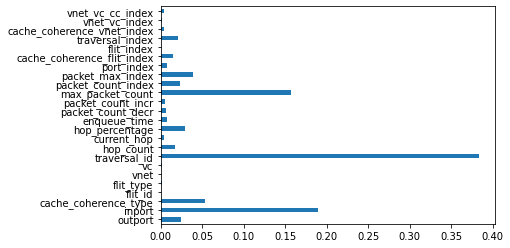

In [123]:
feat_importances = pd.Series(dt.feature_importances_, index=columns)
feat_importances.plot(kind='barh')

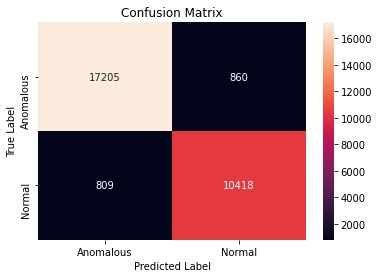

In [124]:
cm = confusion_matrix(y_test, y_pred_dt)
class_label = ["Anomalous", "Normal"]
df_cm = pd.DataFrame(cm, index=class_label,columns=class_label)
sns.heatmap(df_cm, annot=True, fmt='d')
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [125]:
print(classification_report(y_test,y_pred_dt))

              precision    recall  f1-score   support

           0       0.96      0.95      0.95     18065
           1       0.92      0.93      0.93     11227

    accuracy                           0.94     29292
   macro avg       0.94      0.94      0.94     29292
weighted avg       0.94      0.94      0.94     29292



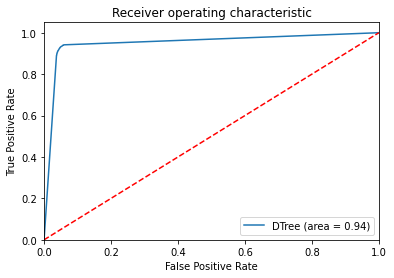

In [126]:
dt_roc_auc = roc_auc_score(y_test, y_pred_dt)
fpr, tpr, thresholds = roc_curve(y_test, dt.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='DTree (area = %0.2f)' % dt_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('DT_ROC')
plt.show()

Random Forest Classifier

In [0]:
#randomforest
from sklearn.ensemble import RandomForestClassifier

In [0]:
# GridSearchCV
param_grid={'max_depth':range(0,25,2),
            'n_estimators':[125,250],
            'max_features':range(0,25,2)}
dt_g=RandomForestClassifier(random_state=42)
dt_cv=GridSearchCV(dt_g,param_grid,cv=10,scoring='f1_micro',n_jobs=-1)
dt_cv.fit(X_train,y_train)

print("Best parameters:",dt_cv.best_params_)
print("Accuracy :",dt_cv.best_score_)

In [128]:
rf = RandomForestClassifier(max_depth=24,max_features=24,n_estimators=125,random_state=42)
rf.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=24, max_features=24,
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=125,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

In [0]:
y_pred_rf= rf.predict(X_test)

In [130]:
rf_score_train = rf.score(X_train,y_train)
print("Train Prediction Score",rf_score_train*100)
rf_score_test = accuracy_score(y_test,y_pred_rf)
print("Test Prediction Score",rf_score_test*100)

Train Prediction Score 99.85234624379086
Test Prediction Score 95.00887614365698


In [131]:
y_pred_rf_test= rf.predict(test_X)
rf_score_test = accuracy_score(test_Y,y_pred_rf_test)
print("Test Prediction Score",rf_score_test*100)

Test Prediction Score 65.37533760798301


In [132]:
y_pred_rf_test= rf.predict(test_XX)
rf_score_test = accuracy_score(test_YY,y_pred_rf_test)
print("Test Prediction Score",rf_score_test*100)

Test Prediction Score 63.37778297656646


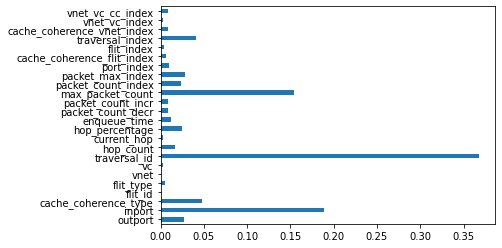

In [133]:
feat_importances = pd.Series(rf.feature_importances_, index=columns)
feat_importances.plot(kind='barh')

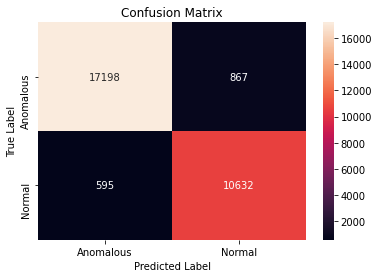

In [134]:
cm = confusion_matrix(y_test, y_pred_rf)
class_label = ["Anomalous", "Normal"]
df_cm = pd.DataFrame(cm, index=class_label,columns=class_label)
sns.heatmap(df_cm, annot=True, fmt='d')
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [135]:
print(classification_report(y_test,y_pred_rf))

              precision    recall  f1-score   support

           0       0.97      0.95      0.96     18065
           1       0.92      0.95      0.94     11227

    accuracy                           0.95     29292
   macro avg       0.95      0.95      0.95     29292
weighted avg       0.95      0.95      0.95     29292



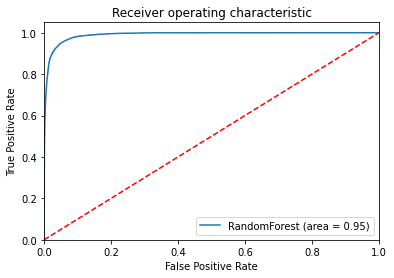

In [136]:
rf_roc_auc = roc_auc_score(y_test, y_pred_rf)
fpr, tpr, thresholds = roc_curve(y_test, rf.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='RandomForest (area = %0.2f)' % rf_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('RF_ROC')
plt.show()

XGBoost Classifier

In [0]:
#xgboost
from xgboost import XGBClassifier
from xgboost import plot_importance

In [0]:
# GridSearchCV
param_grid={'max_depth':range(0,25,2),
            'n_estimators':[125,250,500],
           'min_child_weight':[1,3,6]}
xgb_g=XGBClassifier(random_state=42)
xgb_cv=GridSearchCV(xgb_g,param_grid,cv=10,scoring='accuracy',n_jobs=-1)
xgb_cv.fit(X_train,y_train)

print("Best parameters:",xgb_cv.best_params_)
print("Accuracy :",xgb_cv.best_score_)

In [138]:
xgbc = XGBClassifier(max_depth=24,min_child_weight=1,n_estimators=500,random_state=42,learning_rate=0.2)
xgbc.fit(X_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.2, max_delta_step=0, max_depth=24,
              min_child_weight=1, missing=None, n_estimators=500, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=42,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [0]:
y_pred_xgbc= xgbc.predict(X_test)

In [140]:
xgbc_score_train = xgbc.score(X_train,y_train)
print("Train Prediction Score",xgbc_score_train*100)
xgbc_score_test = accuracy_score(y_test,y_pred_xgbc)
print("Test Prediction Score",xgbc_score_test*100)

Train Prediction Score 99.93598825597869
Test Prediction Score 97.19718694524101


In [141]:
y_pred_xgbc_test= xgbc.predict(test_X)
xgbc_score_test = accuracy_score(test_Y,y_pred_xgbc_test)
print("Test Prediction Score",xgbc_score_test*100)

Test Prediction Score 65.07020184318496


In [142]:
y_pred_xgbc_test= xgbc.predict(test_XX)
xgbc_score_test = accuracy_score(test_YY,y_pred_xgbc_test)
print("Test Prediction Score",xgbc_score_test*100)

Test Prediction Score 69.43112254844621


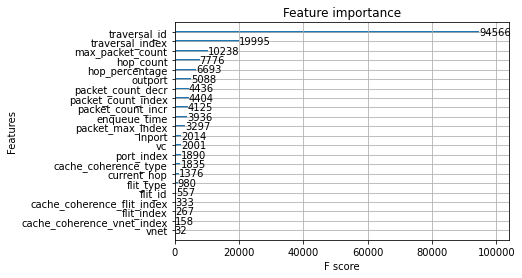

In [143]:
plot_importance(xgbc)
plt.show()

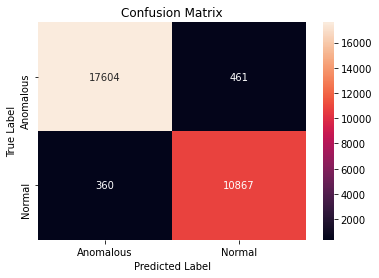

In [144]:
cm = confusion_matrix(y_test, y_pred_xgbc)
class_label = ["Anomalous", "Normal"]
df_cm = pd.DataFrame(cm, index=class_label,columns=class_label)
sns.heatmap(df_cm, annot=True, fmt='d')
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [145]:
print(classification_report(y_test,y_pred_xgbc))

              precision    recall  f1-score   support

           0       0.98      0.97      0.98     18065
           1       0.96      0.97      0.96     11227

    accuracy                           0.97     29292
   macro avg       0.97      0.97      0.97     29292
weighted avg       0.97      0.97      0.97     29292



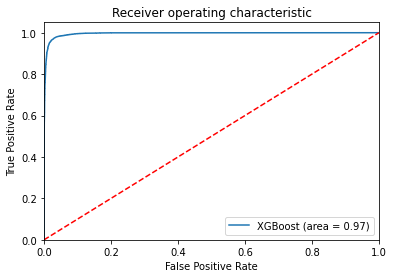

In [146]:
xgb_roc_auc = roc_auc_score(y_test, y_pred_xgbc)
fpr, tpr, thresholds = roc_curve(y_test, xgbc.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='XGBoost (area = %0.2f)' % xgb_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('XGB_ROC')
plt.show()

LightGBM Classifier

In [0]:
#lightgbm
import lightgbm as lgb

In [0]:
# GridSearchCV
param_grid = {'n_estimators': [x for x in range(24,40,2)],
              'learning_rate': [0.10, 0.125, 0.15, 0.175, 0.2]}
lgb_g = lgb.LGBMClassifier(learning_rate = 0.125, metric = 'l1', n_estimators = 20, num_leaves = 38)
lgb_cv = GridSearchCV(lgb_g, param_grid,cv=10)
lgb_cv.fit(X_train, y_train)

print("Best parameters:",lgb_cv.best_params_)
print("Accuracy :",lgb_cv.best_score_)

In [148]:
gbm = lgb.LGBMClassifier(learning_rate = 0.6,  n_estimators = 500, max_depth = 24, random_state=42, min_child_weight=1,metric='binary',boosting_type = 'dart')
gbm.fit(X_train, y_train)

LGBMClassifier(boosting_type='dart', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.6, max_depth=24,
               metric='binary', min_child_samples=20, min_child_weight=1,
               min_split_gain=0.0, n_estimators=500, n_jobs=-1, num_leaves=31,
               objective=None, random_state=42, reg_alpha=0.0, reg_lambda=0.0,
               silent=True, subsample=1.0, subsample_for_bin=200000,
               subsample_freq=0)

In [0]:
y_pred_gbm= gbm.predict(X_test)

In [150]:
gbm_score_train = gbm.score(X_train,y_train)
print("Train Prediction Score",gbm_score_train*100)
gbm_score_test = accuracy_score(y_test,y_pred_gbm)
print("Test Prediction Score",gbm_score_test*100)

Train Prediction Score 93.19000392605363
Test Prediction Score 91.1716509627202


In [163]:
y_pred_gbm_test = gbm.predict(test_X)
gbm_score_test = accuracy_score(test_Y,y_pred_gbm_test)
print("Test Prediction Score",gbm_score_test*100)

Test Prediction Score 63.76306620209059


In [164]:
y_pred_gbm_test = gbm.predict(test_XX)
gbm_score_test = accuracy_score(test_YY,y_pred_gbm_test)
print("Test Prediction Score",gbm_score_test*100)

Test Prediction Score 66.904511248879


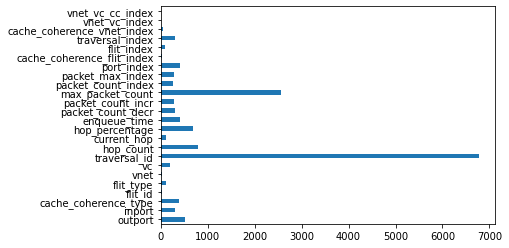

In [153]:
feat_importances = pd.Series(gbm.feature_importances_, index=columns)
feat_importances.plot(kind='barh')

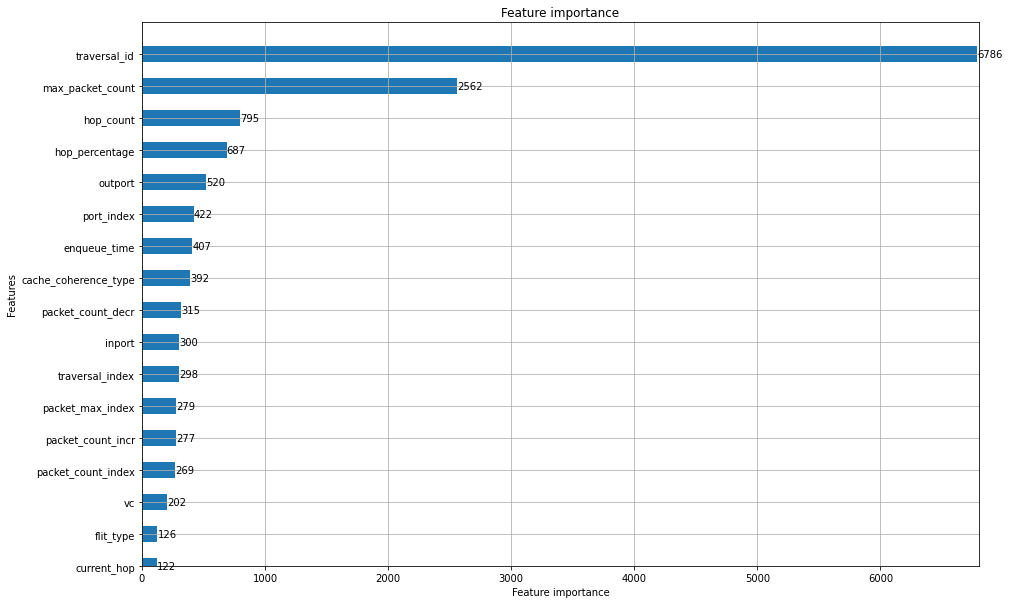

In [159]:
ax = lgb.plot_importance(gbm, height = 0.5, max_num_features = 17, xlim = (0,6800), ylim = (0,17), figsize = (15,10))
plt.show()

In [155]:
sorted(gbm.feature_importances_,reverse=True)

[6786,
 2562,
 795,
 687,
 520,
 422,
 407,
 392,
 315,
 300,
 298,
 279,
 277,
 269,
 202,
 126,
 122,
 86,
 59,
 38,
 37,
 21,
 0,
 0]

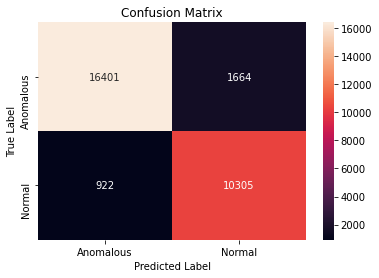

In [156]:
cm = confusion_matrix(y_test, y_pred_gbm)
class_label = ["Anomalous", "Normal"]
df_cm = pd.DataFrame(cm, index=class_label,columns=class_label)
sns.heatmap(df_cm, annot=True, fmt='d')
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [157]:
print(classification_report(y_test,y_pred_gbm))

              precision    recall  f1-score   support

           0       0.95      0.91      0.93     18065
           1       0.86      0.92      0.89     11227

    accuracy                           0.91     29292
   macro avg       0.90      0.91      0.91     29292
weighted avg       0.91      0.91      0.91     29292



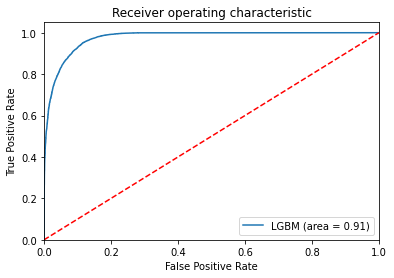

In [158]:
lgbm_roc_auc = roc_auc_score(y_test, y_pred_gbm)
fpr, tpr, thresholds = roc_curve(y_test, gbm.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='LGBM (area = %0.2f)' % lgbm_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('LGBM_ROC')
plt.show()